Step 1: Set up Notebook:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

Step 2: Load and first look into data

In [16]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')


print("Dataset shape:", train_df.shape)
print("\nFirst 5 rows:")
train_df.head()

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Basic Data Understanding

In [24]:
train_df.info()

print("\nMissing Values:")
print(train_df.isnull().sum())

print("Describing the dataset:")
train_df.describe()

print("Column names:")
print(train_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

Step 4: Understanding Target Variable (Survival Rate)

Survival Rate:
Survived
0    549
1    342
Name: count, dtype: int64

Overall survival rate: 38.38%


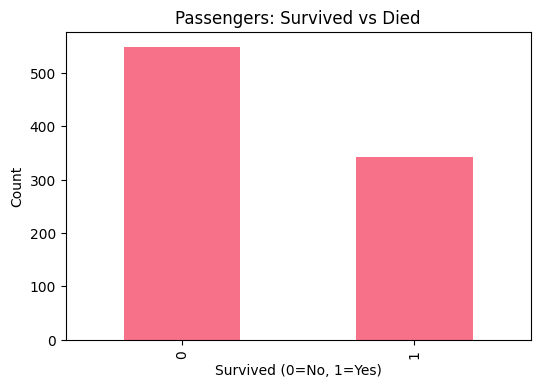

In [ ]:
print("Survival Rate:")

survival_rate = train_df['Survived'].value_counts()
print(survival_rate)
print(f"\nOverall survival rate: {train_df['Survived'].mean():.2%}")

plt.figure(figsize=(6, 4))

survival_rate.plot(kind='bar')
plt.title('Passengers: Survived vs Died')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')

plt.show()


Step 5: Did ... class affect survival?

For example gender, class, age... etc.?